In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('passing_cleaned.csv', index_col=0)

In [4]:
df.shape

(2350, 27)

In [8]:
df.head(10)

,Player,Tm,Age,G,GS,Cmp,Att,Cmp%,Yds,TD,...,AY/A,Y/C,Y/G,Rate,Sk,Yds-s,Sk%,NY/A,ANY/A,Year
0,Kurt Warner,STL,30,16,16,375,546,68.7,4830,36,...,8.4,12.9,301.9,101.4,38,233,6.5,7.87,7.41,2001
1,Peyton Manning,IND,25,16,16,343,547,62.7,4131,26,...,6.6,12.0,258.2,84.1,29,232,5.0,6.77,5.88,2001
2,Brett Favre,GNB,32,16,16,314,510,61.6,3921,32,...,7.6,12.5,245.1,94.1,22,151,4.1,7.09,7.02,2001
3,Aaron Brooks,NOR,25,16,16,312,558,55.9,3832,26,...,6.0,12.3,239.5,76.4,50,330,8.2,5.76,4.99,2001
4,Rich Gannon,OAK,36,16,16,361,549,65.8,3828,27,...,7.2,10.6,239.3,95.5,27,155,4.7,6.38,6.61,2001
5,Trent Green,KAN,31,16,16,296,523,56.6,3783,17,...,5.8,12.8,236.4,71.1,39,198,6.9,6.38,5.06,2001
6,Kerry Collins,NYG,29,16,16,327,568,57.6,3764,19,...,6.0,11.5,235.3,77.1,36,206,6.0,5.89,5.33,2001
7,Jake Plummer,ARI,27,16,16,304,525,57.9,3653,18,...,6.4,12.0,228.3,79.6,29,204,5.2,6.23,5.74,2001
8,Jeff Garcia,SFO,31,16,16,316,504,62.7,3538,32,...,7.2,11.2,221.1,94.8,26,114,4.9,6.46,6.65,2001
9,Doug Flutie,SDG,39,16,16,294,521,56.4,3464,15,...,5.7,11.8,216.5,72.0,25,168,4.6,6.04,5.10,2001


## Filtering the dataset to only include quarterbacks

In [17]:
# Considering the dataset does not have a position column, I have filtered the data set with players who have more than 100 throwing attempts, indicating of a quarterback 
filtered_df = df[(df['Year'].isin([2019, 2020, 2021, 2022, 2023])) & (df['Att'] > 100)]

In [18]:
filtered_df.shape

(223, 26)

In [21]:
filtered_df.sample

<bound method NDFrame.sample of                         Player   Tm  Age   G  GS  Cmp  Att  Cmp%   Yds  TD  \
1845            Jameis Winston  TAM   25  16  16  380  626  60.7  5109  33   
1846              Dak Prescott  DAL   26  16  16  388  596  65.1  4902  30   
1847                Jared Goff  LAR   25  16  16  394  626  62.9  4638  22   
1848             Philip Rivers  LAC   38  16  16  390  591  66.0  4615  23   
1849                 Matt Ryan  ATL   34  15  15  408  616  66.2  4466  26   
...                        ...  ...  ...  ..  ..  ...  ...   ...   ...  ..   
2331              Tyson Bagent  CHI   23   5   4   94  143  65.7   859   3   
2332            Trevor Siemian  NYJ   32   5   3   86  153  56.2   724   2   
2334               P.J. Walker  CLE   28   6   2   54  111  48.6   674   1   
2335         Mitchell Trubisky  PIT   29   5   2   67  107  62.6   632   4   
2339  Dorian Thompson-Robinson  CLE   24   8   3   60  112  53.6   440   1   

      ...  AY/A   Y/C    Y/G  R

In [19]:
filtered_df.columns

Index(['Player', 'Tm', 'Age', 'G', 'GS', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD',
       'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate',
       'Sk', 'Yds-s', 'Sk%', 'NY/A', 'ANY/A', 'Year'],
      dtype='object')

# Quarterback Statistics Prediction Model

## Dataset Columns

The dataset contains the following columns related to quarterback performance:

- **Player**: The name of the player.
- **Tm**: The team for which the player plays.
- **Age**: The age of the player.
- **G**: Games played.
- **GS**: Games started.
- **Cmp**: Completions.
- **Att**: Attempts.
- **Cmp%**: Completion percentage.
- **Yds**: Passing yards.
- **TD**: Touchdowns.
- **TD%**: Touchdown percentage.
- **Int**: Interceptions.
- **Int%**: Interception percentage.
- **1D**: First downs.
- **Lng**: Longest pass.
- **Y/A**: Yards per attempt.
- **AY/A**: Adjusted yards per attempt.
- **Y/C**: Yards per completion.
- **Y/G**: Yards per game.
- **Rate**: Quarterback rating.
- **Sk**: Sacks.
- **Yds-s**: Yards lost due to sacks.
- **Sk%**: Sack percentage.
- **NY/A**: Net yards per pass attempt.
- **ANY/A**: Adjusted net yards per pass attempt.
- **Year**: The year of the season.

## Significant Columns for Prediction Model

When building a prediction model for quarterback statistics, focus on the columns that can most directly influence or indicate performance. Here are some key columns to consider:

- **Cmp% (Completion Percentage)**: Indicates accuracy.
- **Yds (Passing Yards)**: Measures the volume of passing.
- **TD (Touchdowns)**: Direct scoring impact.
- **Int (Interceptions)**: Negative plays affecting team performance.
- **Y/A (Yards per Attempt)**: Efficiency per pass attempt.
- **Rate (Quarterback Rating)**: Overall efficiency and performance rating.
- **ANY/A (Adjusted Net Yards per Pass Attempt)**: A comprehensive efficiency metric that includes touchdowns, interceptions, and sacks.
- **Age (Age of the Player)**: Can influence performance due to experience and physical condition.
- **Y/G (Yards per Game)**: Indicator of a quarterback's productivity and consistency.

These columns represent a mix of volume metrics (like Yds and TD) and efficiency metrics (like Cmp%, Y/A, ANY/A), providing a balanced view of a quarterback's performance.



In [34]:
# Define the columns to use for grouping and the features to include in the analysis
groupby_features = ['Player', 'Year']
qb_features = ['Player', 'Year', 'TD', 'Yds', 'Cmp%', 'Att', 'Rate', 'Y/G', 'Int', 'Y/A', 'ANY/A', 'Age']

# Grouping the dataframe and aggregating specific metrics
qb_df = (filtered_df
         .loc[:, qb_features]
         .groupby(groupby_features, as_index=False)
         .agg({
             'TD': 'sum',      # Total touchdowns
             'Yds': 'sum',     # Total passing yards
             'Cmp%': 'mean',   # Average completion percentage
             'Att': 'sum',     # Total passing attempts
             'Rate': 'mean',   # Average quarterback rating
             'Y/G': 'mean',    # Average yards per game
             'Int': 'sum',     # Total interceptions
             'Y/A': 'mean',    # Average yards per attempt
             'ANY/A': 'mean',  # Average adjusted net yards per pass attempt
             'Age': 'first'    # Age of the player (typically constant per season)
         }))

# Display the first few rows to check the result
print(qb_df.head())



            Player  Year  TD   Yds  Cmp%  Att   Rate    Y/G  Int  Y/A  ANY/A  \
0    Aaron Rodgers  2019  26  4002  62.0  569   95.4  250.1    4  7.0   6.71   
1    Aaron Rodgers  2020  48  4299  70.7  526  121.5  268.7    5  8.2   8.89   
2    Aaron Rodgers  2021  37  4115  68.9  531  111.9  257.2    4  7.7   8.00   
3    Aaron Rodgers  2022  26  3695  64.6  542   91.1  217.4   12  6.8   5.95   
4  Aidan O'Connell  2023  12  2218  62.1  343   83.9  201.6    7  6.5   5.37   

   Age  
0   36  
1   37  
2   38  
3   39  
4   25  


In [35]:
qb_df.sample(10)

,Player,Year,TD,Yds,Cmp%,Att,Rate,Y/G,Int,Y/A,ANY/A,Age
100,Joe Flacco,2019,6,1822,65.3,262,85.1,227.8,5,7.0,5.29,34
188,Sam Darnold,2022,7,1143,58.6,140,92.6,190.5,3,8.2,7.13,25
66,Easton Stick,2023,3,1129,63.8,174,85.6,225.8,1,6.5,5.44,28
165,P.J. Walker,2023,1,674,48.6,111,52.2,112.3,5,6.1,3.11,28
200,Tom Brady,2019,24,4057,60.8,613,88.0,253.6,8,6.6,6.24,42
69,Gardner Minshew II,2020,16,2259,66.1,327,95.9,251.0,5,6.9,6.23,24
10,Bailey Zappe,2023,6,1272,59.9,212,68.7,127.2,9,6.0,3.36,24
190,Sam Howell,2023,21,3946,63.4,612,78.9,232.1,21,6.4,4.39,23
16,Ben Roethlisberger,2020,33,3803,65.6,608,94.1,253.5,10,6.3,6.27,38
215,Tyler Huntley,2022,2,658,67.0,112,77.2,109.7,3,5.9,4.45,24


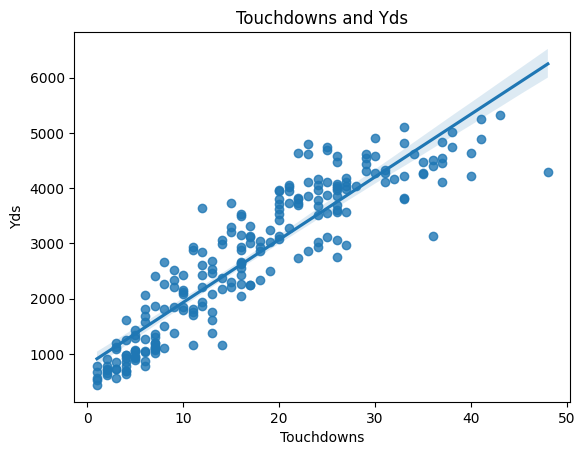

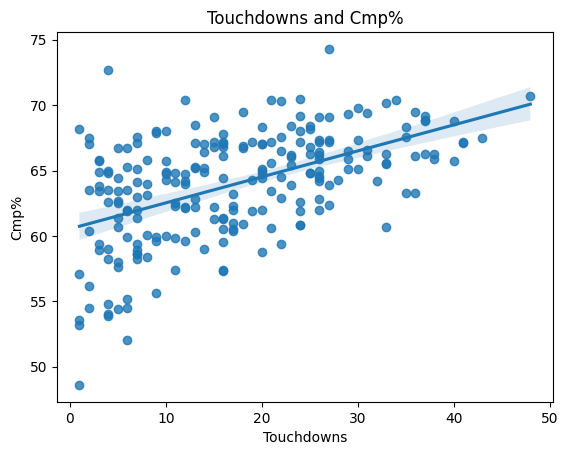

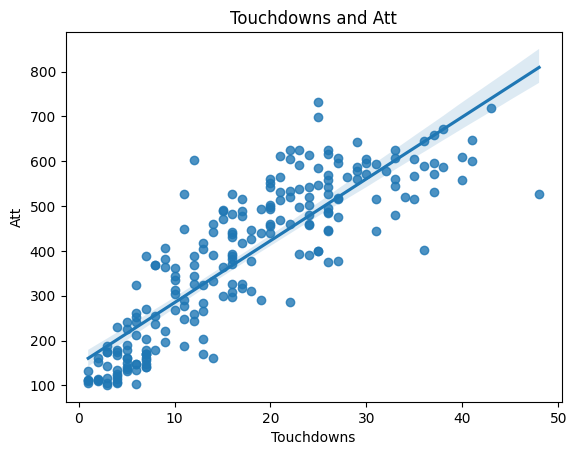

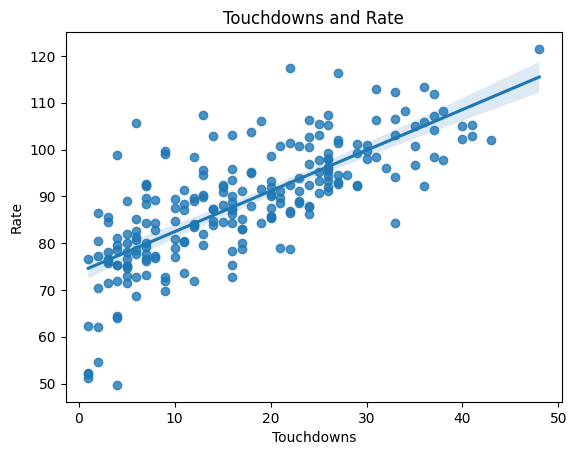

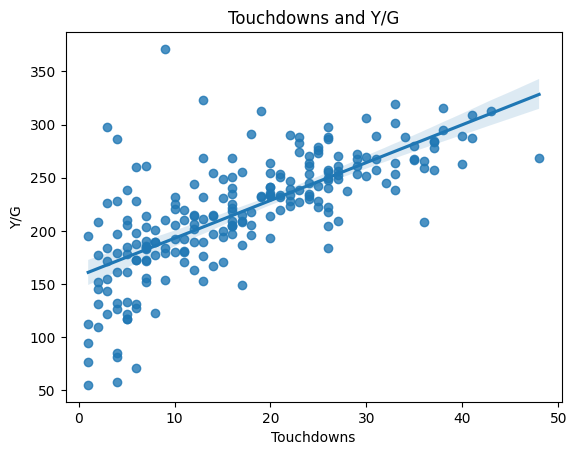

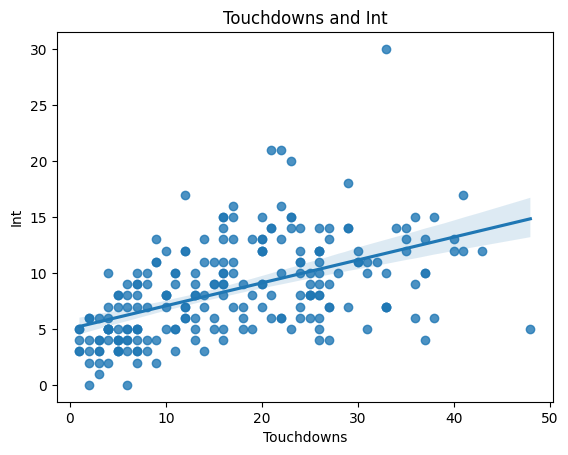

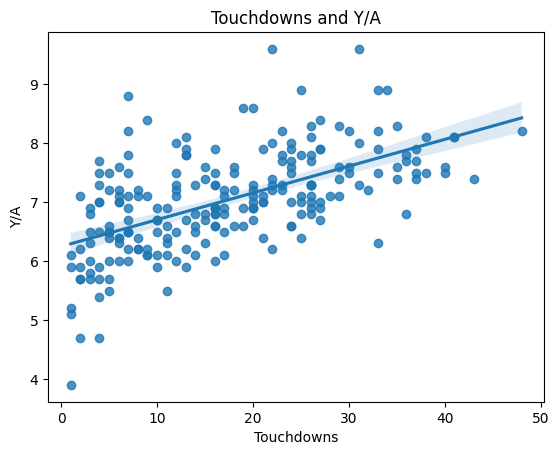

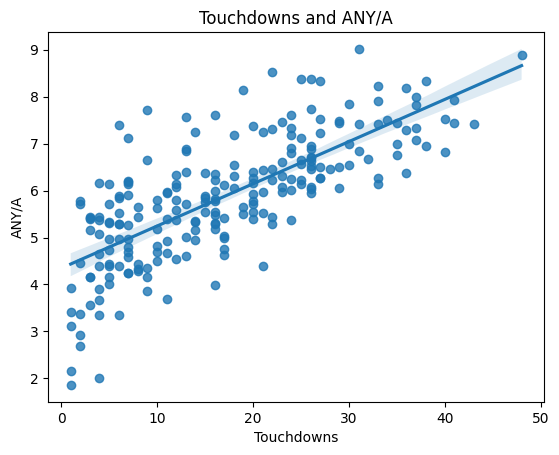

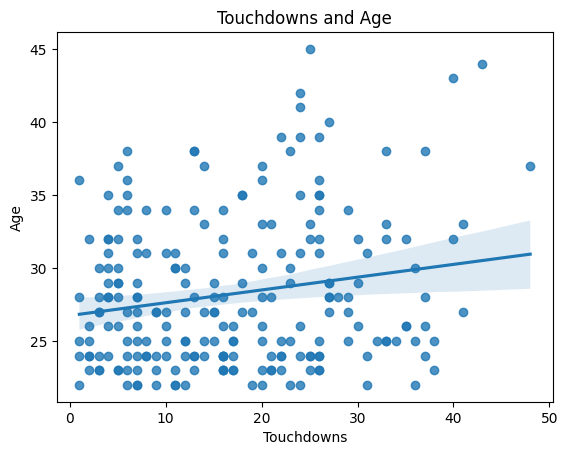

In [36]:
for y in ['Yds', 'Cmp%', 'Att', 'Rate', 'Y/G', 'Int', 'Y/A', 'ANY/A', 'Age']:
    plt.figure()  # Create a new figure for each plot
    sns.regplot(data=qb_df, x='TD', y=y)
    plt.title(f'Touchdowns and {y}')
    plt.xlabel('Touchdowns')  # Optionally set the x-label
    plt.ylabel(y)  # Optionally set the y-label

plt.show()

In [40]:
# Save the DataFrame to a CSV file
qb_df.to_csv('quarterback_stats.csv', index=False)


## Predictiing The Future

In [50]:
# Make a copy of qb_df for manipulation
_df = qb_df.copy()

# Increment the 'Year' in the copy to align previous year's stats with the current year in the original DataFrame
_df['Year'] = _df['Year'] + 1  # Ensure we're modifying the copy

# Merge the original DataFrame with the modified copy to align each player's previous year stats
new_qb_df = qb_df.merge(_df, on=['Player', 'Year'], suffixes=('', '_prev'), how='left').dropna()


In [51]:
new_qb_df

,Player,Year,TD,Yds,Cmp%,Att,Rate,Y/G,Int,Y/A,...,TD_prev,Yds_prev,Cmp%_prev,Att_prev,Rate_prev,Y/G_prev,Int_prev,Y/A_prev,ANY/A_prev,Age_prev
1,Aaron Rodgers,2020,48,4299,70.7,526,121.5,268.7,5,8.2,...,26.0,4002.0,62.0,569.0,95.4,250.1,4.0,7.0,6.71,36.0
2,Aaron Rodgers,2021,37,4115,68.9,531,111.9,257.2,4,7.7,...,48.0,4299.0,70.7,526.0,121.5,268.7,5.0,8.2,8.89,37.0
3,Aaron Rodgers,2022,26,3695,64.6,542,91.1,217.4,12,6.8,...,37.0,4115.0,68.9,531.0,111.9,257.2,4.0,7.7,8.00,38.0
7,Andy Dalton,2020,14,2170,64.9,333,87.3,197.3,8,6.5,...,16.0,3494.0,59.5,528.0,78.3,268.8,14.0,6.6,5.19,32.0
8,Andy Dalton,2021,8,1515,63.1,236,76.9,189.4,9,6.4,...,14.0,2170.0,64.9,333.0,87.3,197.3,8.0,6.5,5.34,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Tua Tagovailoa,2022,25,3548,64.8,400,105.5,272.9,8,8.9,...,16.0,2653.0,67.8,388.0,90.1,204.1,10.0,6.8,5.81,23.0
213,Tua Tagovailoa,2023,29,4624,69.3,560,101.1,272.0,14,8.3,...,25.0,3548.0,64.8,400.0,105.5,272.9,8.0,8.9,8.37,24.0
215,Tyler Huntley,2022,2,658,67.0,112,77.2,109.7,3,5.9,...,3.0,1081.0,64.9,188.0,76.6,154.4,4.0,5.8,4.15,23.0
221,Zach Wilson,2022,6,1688,54.5,242,72.8,187.6,7,7.0,...,9.0,2334.0,55.6,383.0,69.7,179.5,11.0,6.1,3.86,22.0


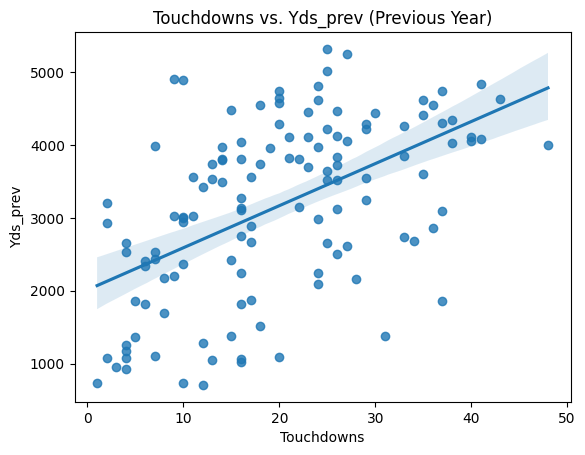

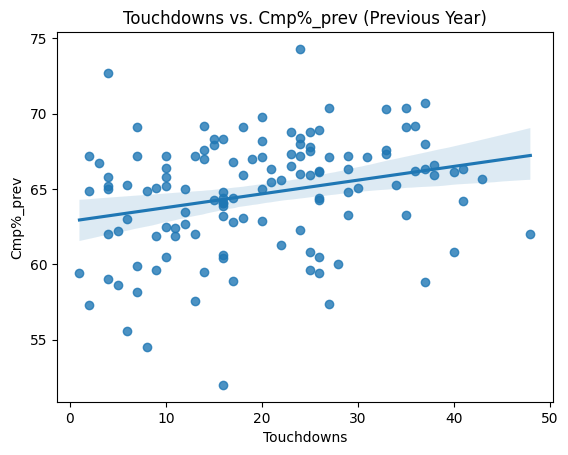

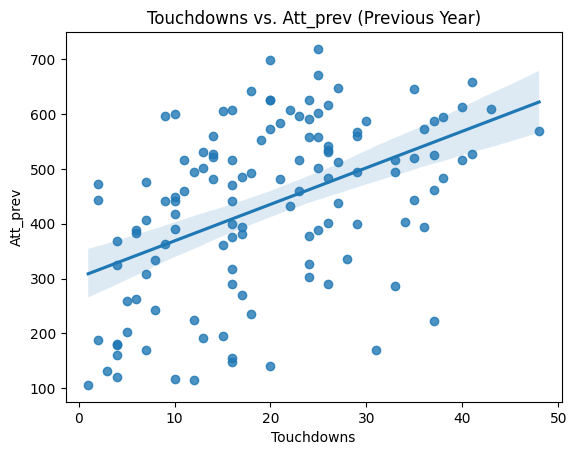

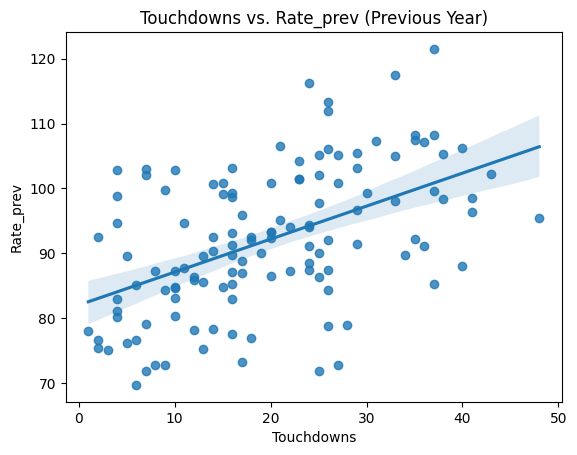

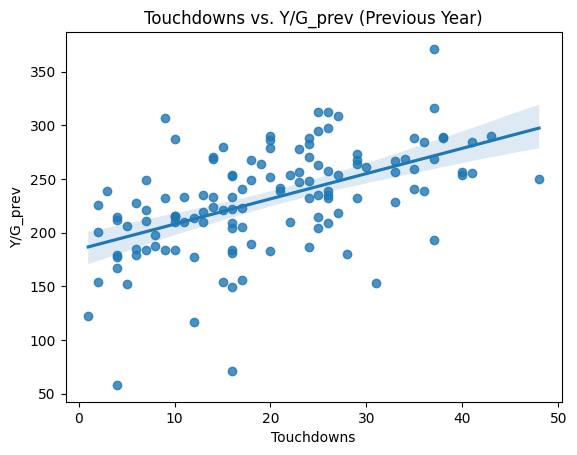

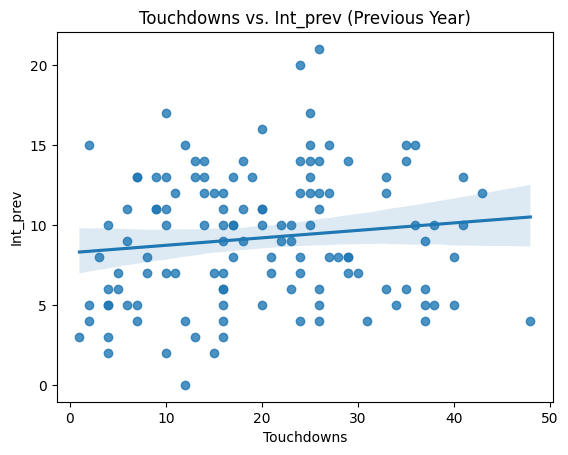

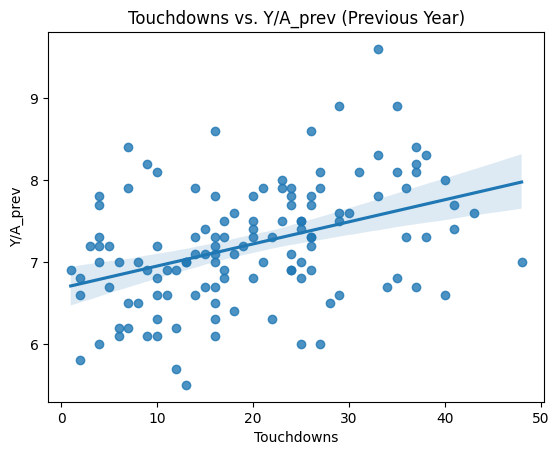

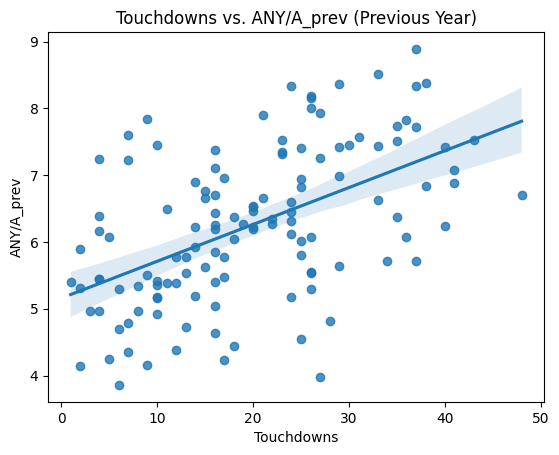

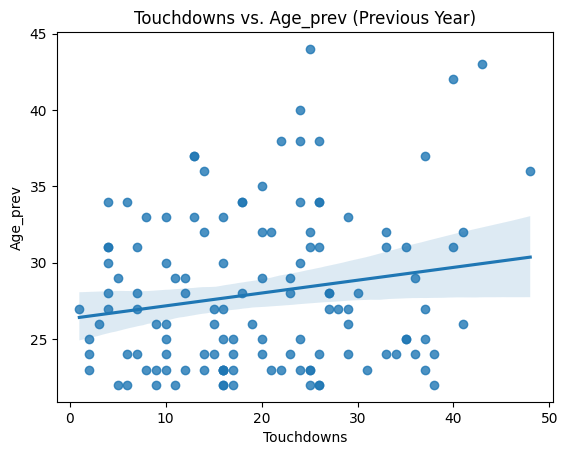

In [52]:
features_prev_year = ['Yds_prev', 'Cmp%_prev', 'Att_prev', 'Rate_prev', 'Y/G_prev', 'Int_prev', 'Y/A_prev', 'ANY/A_prev', 'Age_prev']

# Loop through each feature in the list of previous year features
for y in features_prev_year:
    plt.figure()  # Create a new figure for each plot
    sns.regplot(data=new_qb_df, x='TD', y=y)
    plt.title(f'Touchdowns vs. {y} (Previous Year)')
    plt.xlabel('Touchdowns')  # Set the x-label to 'Touchdowns'
    plt.ylabel(y)  # Set the y-label to the feature name
    plt.show()  # Show the plot

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [56]:
features = ['Yds_prev', 'Cmp%_prev', 'Att_prev', 'Rate_prev', 'Y/G_prev', 'Int_prev', 'Y/A_prev', 'ANY/A_prev', 'Age_prev']

In [57]:
target = 'TD'

In [58]:
model_data = (new_qb_df.dropna(subset=features+[target]))

In [62]:
#train on 2022 data
train_data = (model_data
              .loc[model_data['Year'] == 2022])

In [63]:
#train on 2023 data
test_data = (model_data
              .loc[model_data['Year'] == 2023])

In [64]:
# intialize linear regression
model = LinearRegression()

In [65]:
#fitting the model , training the model on training data
model.fit(train_data.loc[:,features],
          train_data[target])

LinearRegression()

In [66]:
# predicting the test data
preds = model.predict(test_data.loc[:,features])

In [68]:
# setting index 
preds= pd.Series(preds,index =test_data.index)

In [69]:
# joining predictions back to test dataset 
test_data['preds'] = preds

/var/folders/t6/n5_p2l9d713fcc34t476hzhw0000gn/T/ipykernel_94939/3425631096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['preds'] = preds


In [72]:
rmse = mean_squared_error(test_data['TD'], test_data['preds'])**0.5
r2 = pearsonr(test_data['TD'], test_data['preds'])[0]**2
print(f'rmse: {rmse}\nr2: {r2}')

rmse: 11.009541659430596
r2: 0.18632536699024282


## Model Evaluation Metrics

### Root Mean Squared Error (RMSE)
- **Value**: 11.009541659430596
- **Interpretation**: RMSE measures the average magnitude of the errors between the predicted values from the model and the actual values in the dataset. It is expressed in the same units as the target variable. An RMSE of approximately 11 indicates that the typical prediction by the model deviates from the actual number of touchdowns by about 11 touchdowns.
- **Contextual Evaluation**: The acceptability of an RMSE of 11 depends on the range of touchdowns in your dataset. For a smaller range (e.g., 0 to 20), this value could suggest poor prediction accuracy.

### R-squared (R²)
- **Value**: 0.18632536699024282
- **Interpretation**: R-squared is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables in a regression model. An R² of 0.186 implies that only about 18.6% of the variance in touchdowns is explained by the model.
- **Contextual Evaluation**: This low R² value indicates that the model does not effectively capture the underlying pattern of the data, suggesting limitations in either the model itself or the explanatory variables used.

### Overall Evaluation and Suggestions
- **Model Performance**: The combination of RMSE and R² suggests potential underperformance, indicating both accuracy issues and a lack of explanatory power.
- **Improvement Strategies**:
  - **Feature Engineering**: Enhance the model by reviewing and potentially adding more relevant features or transforming existing features.
  - **Model Complexity**: Consider whether a more complex model or a different model type might capture the underlying patterns more effectively.
  - **Data Quality**: Investigate and address possible data quality issues like outliers or errors.
  - **Cross-Validation**: Implement cross-validation to better understand how the model generalizes to new data sets.

These strategies aim to refine the model, aiming for better predictive accuracy and explanatory power.


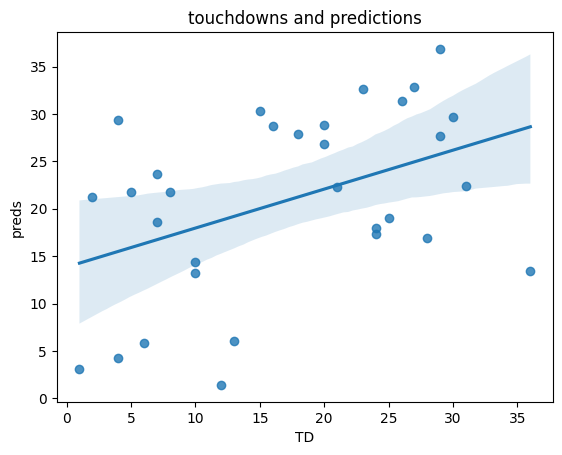

In [73]:
sns.regplot(data = test_data, x='TD', y= 'preds')
plt.title('touchdowns and predictions')
plt.show()

In [77]:
test_data.loc[:,['Year','Player','TD','preds']]

,Year,Player,TD,preds
15,2023,Baker Mayfield,28,16.869239
20,2023,Brock Purdy,31,22.405544
37,2023,Dak Prescott,36,13.396295
42,2023,Daniel Jones,2,21.250406
50,2023,Derek Carr,25,19.048966
54,2023,Deshaun Watson,7,18.564800
56,2023,Desmond Ridder,12,1.408081
72,2023,Geno Smith,20,28.835089
81,2023,Jalen Hurts,23,32.629807
89,2023,Jared Goff,30,29.667631


## Model Evaluation Summary

### Observations from Predicted vs Actual Touchdowns

- **Discrepancies Noted**:
  - Significant overpredictions and underpredictions across various players.
  - Example of underprediction: Desmond Ridder (Actual: 12, Predicted: 1.408081).
  - Example of overprediction: Ryan Tannehill (Actual: 4, Predicted: 29.326185).

### Overall Model Performance

- **Variance in Prediction Accuracy**:
  - The predictions show considerable variance, suggesting potential issues in model capability to consistently predict across different data points.

### Potential Issues Indicated

- **Overfitting/Underfitting**:
  - The range of prediction errors might indicate overfitting to certain types of data or underfitting due to a model that does not capture all underlying patterns.

### Recommendations for Model Improvement

- **Feature Review**:
  - Investigate the features used in modeling to ensure comprehensive coverage of influential factors.
  
- **Increase Model Complexity**:
  - Consider using more complex models to capture nonlinear relationships if the current model is too simple.
  
- **Data Quality and Expansion**:
  - Ensure high data quality and consider increasing the dataset size with more seasons or detailed metrics.
  
- **Cross-Validation**:
  - Implement or enhance cross-validation techniques to ensure the model generalizes well across different data sets.

### Quantitative Evaluation

- **Further Statistical Analysis**:
  - Compute statistical metrics like RMSE and R-squared on this test set to quantify prediction errors and explained variance.
  
- **Residual Analysis**:
  - Analyze the residuals to detect any patterns or biases in prediction errors, which can help in refining the model further.

By addressing these points, the goal is to refine the model to improve predictive accuracy and reliability in capturing NFL quarterback touchdown performance.
